# 서울시 일반음식점 폐업 분석
* 개업 이후 폐업까지 5년이내인 경우는 전체 폐업 중 몇 %를 차지할까?
* 2020년 상반기 코로나로 인한 일반음식점 폐업률이 가시적일까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
import os
if(os.name=="posix"):
    sns.set(font="AppleGothic")
elif(os.name=="nt"):
    sns.set(font="Malgun Gothic")

In [4]:
%config InlineBackend.figure_format='retina'

## raw data를 가져와서 분석
* data.seoul.go.kr
* 인허가일자와 폐업일자를 중요하게 분석해야 하는데 상당히 많은 오타와 결측치를 대체한 무의미한 값으로 채워진 항목들이 많았음
* 추측가능한 오타는 수정하고 판단하기 어려운 항목은 파일 내에서 제거함

In [5]:
df_raw=pd.read_csv("D:\Download\서울시_식품위생업소_일반음식점.csv",encoding="cp949")
df_raw.shape

C:\Users\minja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(451966, 47)

In [6]:
df_raw.head()

,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,1,일반음식점,07_24_04_P,3000000,3000000-101-1990-01062,19900428,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,49.44,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3000000,3000000-101-1990-05725,19900810,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,165.10,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3000000,3000000-101-1995-05778,19950720,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,78.28,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3000000,3000000-101-1995-02440,19950722,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,44.10,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3000000,3000000-101-1995-07229,19950516,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,65.04,NaN,NaN,NaN


In [7]:
df_raw.columns

Index(['번호', '개방서비스명', '개방서비스ID', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

In [8]:
df_raw.isnull().sum()

번호                0
개방서비스명            0
개방서비스ID           0
개방자치단체코드          0
관리번호              0
인허가일자             0
인허가취소일자      451966
영업상태구분코드          0
영업상태명             0
상세영업상태코드          0
상세영업상태명           0
폐업일자         122176
휴업시작일자       451966
휴업종료일자       451966
재개업일자        451966
소재지전화        118218
소재지면적         36192
소재지우편번호         175
소재지전체주소         167
도로명전체주소      251028
도로명우편번호      254422
사업장명              1
최종수정시점            0
데이터갱신구분           0
데이터갱신일자           0
업태구분명            20
좌표정보(X)       24413
좌표정보(Y)       24413
위생업태명            30
남성종사자수       176781
여성종사자수       174540
영업장주변구분명     200085
등급구분명        209790
급수시설구분명      144750
총종업원수        451966
본사종업원수       451860
공장사무직종업원수    451861
공장판매직종업원수    451861
공장생산직종업원수    451861
건물소유구분명      451966
보증액          451860
월세액          451860
다중이용업소여부         10
시설총규모            10
전통업소지정번호     450220
전통업소주된음식     451048
홈페이지         451966
dtype: int64

In [9]:
pd.set_option('display.float_format','{:.0f}'.format)
df_raw[["인허가일자", "폐업일자"]].describe()

,인허가일자,폐업일자
count,451966,329790
mean,20020596,20056412
std,102903,103819
min,18991230,11111111
25%,19950104,19991210
50%,20011114,20051028
75%,20101111,20130130
max,20200731,20200731


In [10]:
df_raw["폐업일자"].idxmin()

243420

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451966 entries, 0 to 451965
Data columns (total 47 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   번호         451966 non-null  int64  
 1   개방서비스명     451966 non-null  object 
 2   개방서비스ID    451966 non-null  object 
 3   개방자치단체코드   451966 non-null  int64  
 4   관리번호       451966 non-null  object 
 5   인허가일자      451966 non-null  int64  
 6   인허가취소일자    0 non-null       float64
 7   영업상태구분코드   451966 non-null  int64  
 8   영업상태명      451966 non-null  object 
 9   상세영업상태코드   451966 non-null  int64  
 10  상세영업상태명    451966 non-null  object 
 11  폐업일자       329790 non-null  float64
 12  휴업시작일자     0 non-null       float64
 13  휴업종료일자     0 non-null       float64
 14  재개업일자      0 non-null       float64
 15  소재지전화      333748 non-null  object 
 16  소재지면적      415774 non-null  object 
 17  소재지우편번호    451791 non-null  float64
 18  소재지전체주소    451799 non-null  object 
 19  도로명전체주소    200938 non-n

## 유의미하지 않은 값의 행데이터를 제거
* 인허가일자와 폐업일자에서 18991230 또는 11111111등의 값을 발견하였고 이를 drop
* 인허가일자와 폐업일자의 차이가 오타 혹은 정보 부족으로 유의미하지 않게 입력된 값 drop

In [12]:
drop_row1 = df_raw[df_raw["인허가일자"]<19000101].index
drop_row1 = drop_row1.tolist()
len(drop_row1)

59

In [13]:
drop_row2 = df_raw[df_raw["폐업일자"]<19000101].index
drop_row2 = drop_row2.tolist()
len(drop_row2)

883

In [14]:
drop_row3 = df_raw[df_raw["폐업일자"]-df_raw["인허가일자"]<=0].index
drop_row3 = drop_row3.tolist()
len(drop_row3)

2443

In [15]:
drop_row4 = df_raw[df_raw["사업장명"]=="."].index
drop_row4 = drop_row4.tolist()
len(drop_row4)

16

In [16]:
drop_row = drop_row1 + drop_row2 + drop_row3 + drop_row4
len(drop_row)

3401

In [17]:
print(df_raw.shape)
df_filter= df_raw.drop(drop_row, axis=0)
print(df_filter.shape)

(451966, 47)
(449448, 47)


## filtering된 data에서 분석에 필요한 columns만 추출

In [18]:
df_use = df_filter.loc[:,['번호', '인허가일자', '상세영업상태코드', '상세영업상태명', '폐업일자', 
                          '소재지전체주소', '도로명전체주소', '사업장명', '업태구분명', '좌표정보(X)', '좌표정보(Y)']]
df_use

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,1,19900428,1,영업,nan,서울특별시 종로구 신문로1가 163-0번지,서울특별시 종로구 새문안로 92 (신문로1가),청원식당,한식,197713,451938
1,2,19900810,1,영업,nan,서울특별시 종로구 동숭동 1-49번지,서울특별시 종로구 대학로8가길 56 (동숭동),반저,일식,200182,453412
2,3,19950720,1,영업,nan,서울특별시 종로구 수송동 146-1번지 이마빌딩지하1층,"서울특별시 종로구 종로1길 42 (수송동,이마빌딩지하1층)",경수사,일식,198077,452402
3,4,19950722,1,영업,nan,서울특별시 종로구 예지동 151-2번지,서울특별시 종로구 청계천로 173-4 (예지동),다복집,한식,199648,451872
4,5,19950516,1,영업,nan,서울특별시 종로구 명륜2가 27-1번지 (지상1층),"서울특별시 종로구 창경궁로34길 24-6 (명륜2가,(지상1층))",혜화곱창,분식,200004,453519
...,...,...,...,...,...,...,...,...,...,...,...
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798


In [19]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449448 entries, 0 to 451965
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   번호        449448 non-null  int64  
 1   인허가일자     449448 non-null  int64  
 2   상세영업상태코드  449448 non-null  int64  
 3   상세영업상태명   449448 non-null  object 
 4   폐업일자      327286 non-null  float64
 5   소재지전체주소   449281 non-null  object 
 6   도로명전체주소   200904 non-null  object 
 7   사업장명      449447 non-null  object 
 8   업태구분명     449428 non-null  object 
 9   좌표정보(X)   425299 non-null  float64
 10  좌표정보(Y)   425299 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 41.1+ MB


In [20]:
df_use["상세영업상태코드"].value_counts()

2    327292
1    122156
Name: 상세영업상태코드, dtype: int64

In [21]:
pd.set_option('display.float_format','{:.0f}'.format)
df_use[["인허가일자", "폐업일자"]].describe()

,인허가일자,폐업일자
count,449448,327286
mean,20021118,20059835
std,102177,79349
min,19000531,19820224
25%,19950111,20000113
50%,20011201,20051130
75%,20101130,20130225
max,20200731,20200731


## 폐업상태의 업체만 추출
* 폐업일자의 결측치 존재 확인하여 0으로 채우고 해당 행을 drop
* 인허가일자와 폐업일자에서 각각 인허가년도와 폐업년도를 추출하여 새로운 열을 만듦

In [22]:
df_closed=df_use[df_use["상세영업상태코드"]==2].copy()
df_closed.shape

(327292, 11)

In [23]:
df_closed

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
7112,7113,19841121,2,폐업,19961119,서울특별시 종로구 와룡동 168-0번지,NaN,고니,분식,nan,nan
7113,7114,19841121,2,폐업,19930401,서울특별시 종로구 이화동 192-2번지,NaN,임진강,정종/대포집/소주방,200191,452671
7114,7115,19841122,2,폐업,20030127,서울특별시 종로구 관훈동 186-0번지,NaN,청동시대,경양식,198561,452428
7115,7116,19841122,2,폐업,19970128,서울특별시 종로구 청진동 258-1번지,NaN,갤러리호프,분식,nan,nan
7116,7117,19841122,2,폐업,20020130,서울특별시 종로구 종로3가 137번지,NaN,종로손칼국수,분식,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798


In [24]:
df_closed.isnull().sum()

번호               0
인허가일자            0
상세영업상태코드         0
상세영업상태명          0
폐업일자             6
소재지전체주소         80
도로명전체주소     246547
사업장명             0
업태구분명           10
좌표정보(X)      22831
좌표정보(Y)      22831
dtype: int64

In [25]:
df_closed["폐업일자"]=df_closed["폐업일자"].fillna(0).copy()
df_closed.isnull().sum()

번호               0
인허가일자            0
상세영업상태코드         0
상세영업상태명          0
폐업일자             0
소재지전체주소         80
도로명전체주소     246547
사업장명             0
업태구분명           10
좌표정보(X)      22831
좌표정보(Y)      22831
dtype: int64

In [26]:
drop_zero = df_closed[df_closed["폐업일자"]==0].index
len(drop_zero)

6

In [27]:
df_closed = df_closed.drop(drop_zero, axis=0).copy()
df_closed.shape

(327286, 11)

In [28]:
df_closed["인허가년도"]=df_closed["인허가일자"].map(lambda x: int(x//10000))
df_closed.tail()

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),인허가년도
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197,2001
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088,2001
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995,2001
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798,2001
451965,452115,20010804,2,폐업,20051230,서울특별시 강동구 길동 359-34번지,NaN,성운,호프/통닭,212610,448588,2001


In [29]:
df_closed["폐업일자"].astype(int)

7112      19961119
7113      19930401
7114      20030127
7115      19970128
7116      20020130
            ...   
451961    20020326
451962    20020715
451963    20040513
451964    20121129
451965    20051230
Name: 폐업일자, Length: 327286, dtype: int32

In [30]:
df_closed["폐업년도"]=df_closed["폐업일자"].map(lambda x: int(x//10000))
df_closed.tail()

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),인허가년도,폐업년도
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197,2001,2002
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088,2001,2002
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995,2001,2004
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798,2001,2012
451965,452115,20010804,2,폐업,20051230,서울특별시 강동구 길동 359-34번지,NaN,성운,호프/통닭,212610,448588,2001,2005


In [31]:
df_closed["영업기간"] = (df_closed["폐업년도"]-df_closed["인허가년도"]).map(lambda x : int(x))
df_closed.tail()

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),인허가년도,폐업년도,영업기간
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197,2001,2002,1
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088,2001,2002,1
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995,2001,2004,3
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798,2001,2012,11
451965,452115,20010804,2,폐업,20051230,서울특별시 강동구 길동 359-34번지,NaN,성운,호프/통닭,212610,448588,2001,2005,4


## 폐업 데이터 시각화

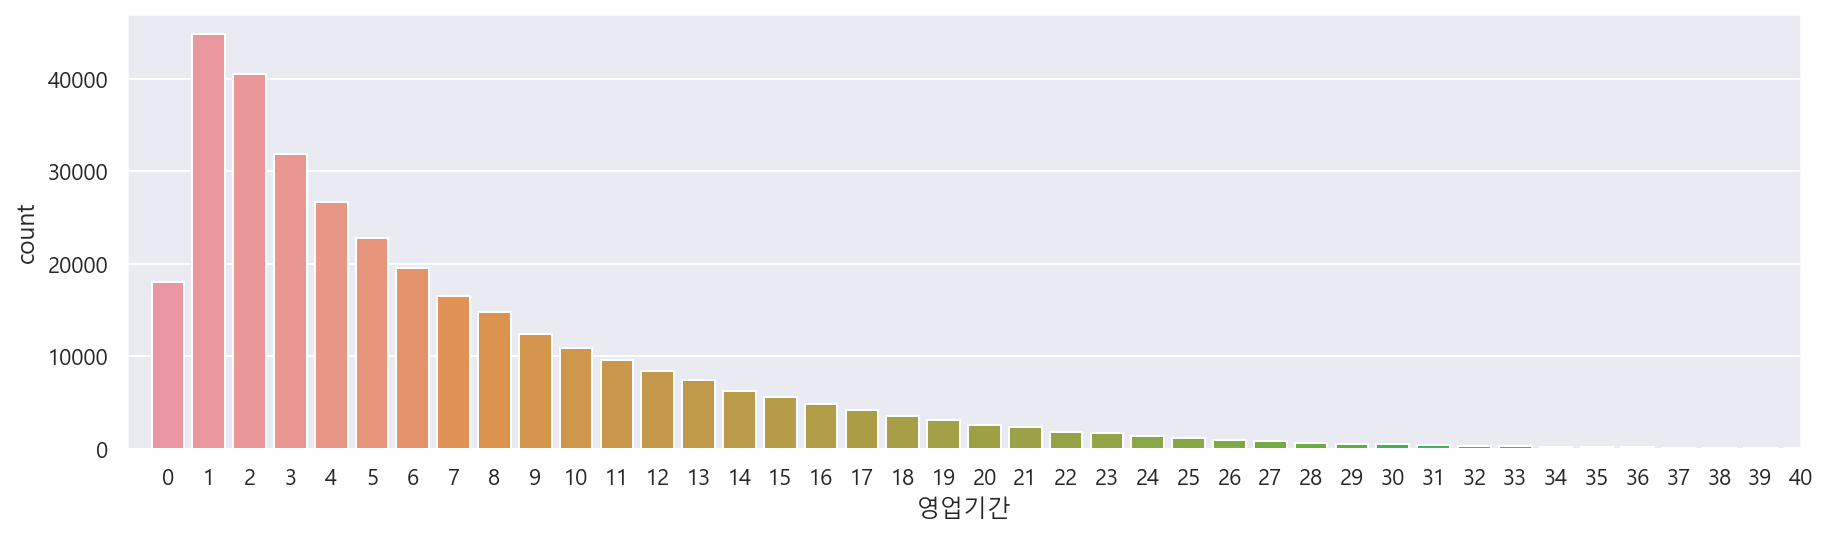

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_closed, x="영업기간")
plt.xlim(-1,40)
plt.show()

([<matplotlib.patches.Wedge at 0x26303aabc10>,
 [Text(-0.21906741705807609, 1.0779654293081495, '5년 이내 폐업'),
  Text(0.21906741705807595, -1.0779654293081495, '그 외')],
 [Text(-0.11949131839531421, 0.5879811432589905, '56.38%'),
  Text(0.11949131839531414, -0.5879811432589905, '43.62%')])

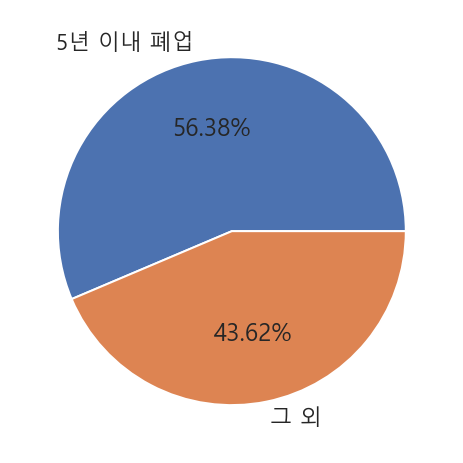

In [33]:
df_infive = df_closed[df_closed["영업기간"]<=5]
pie_label=["5년 이내 폐업", "그 외"]
pie_size=[len(df_infive), len(df_closed)-len(df_infive)]
plt.pie(pie_size, labels=pie_label, autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x263001aef10>,
 [Text(-0.869546131848235, 0.673713236167861, '10년 이내 폐업'),
  Text(0.8695461318482349, -0.6737132361678612, '그 외')],
 [Text(-0.4742978900990372, 0.36747994700065145, '79.02%'),
  Text(0.47429789009903717, -0.3674799470006515, '20.98%')])

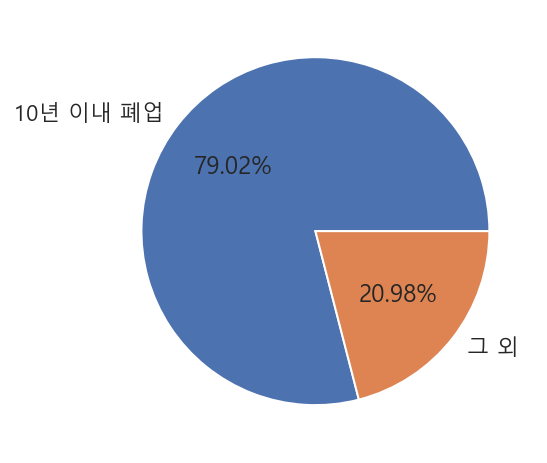

In [34]:
df_inten = df_closed[df_closed["영업기간"]<=10]
pie_label=["10년 이내 폐업", "그 외"]
pie_size=[len(df_inten), len(df_closed)-len(df_inten)]
plt.pie(pie_size, labels=pie_label, autopct='%1.2f%%')

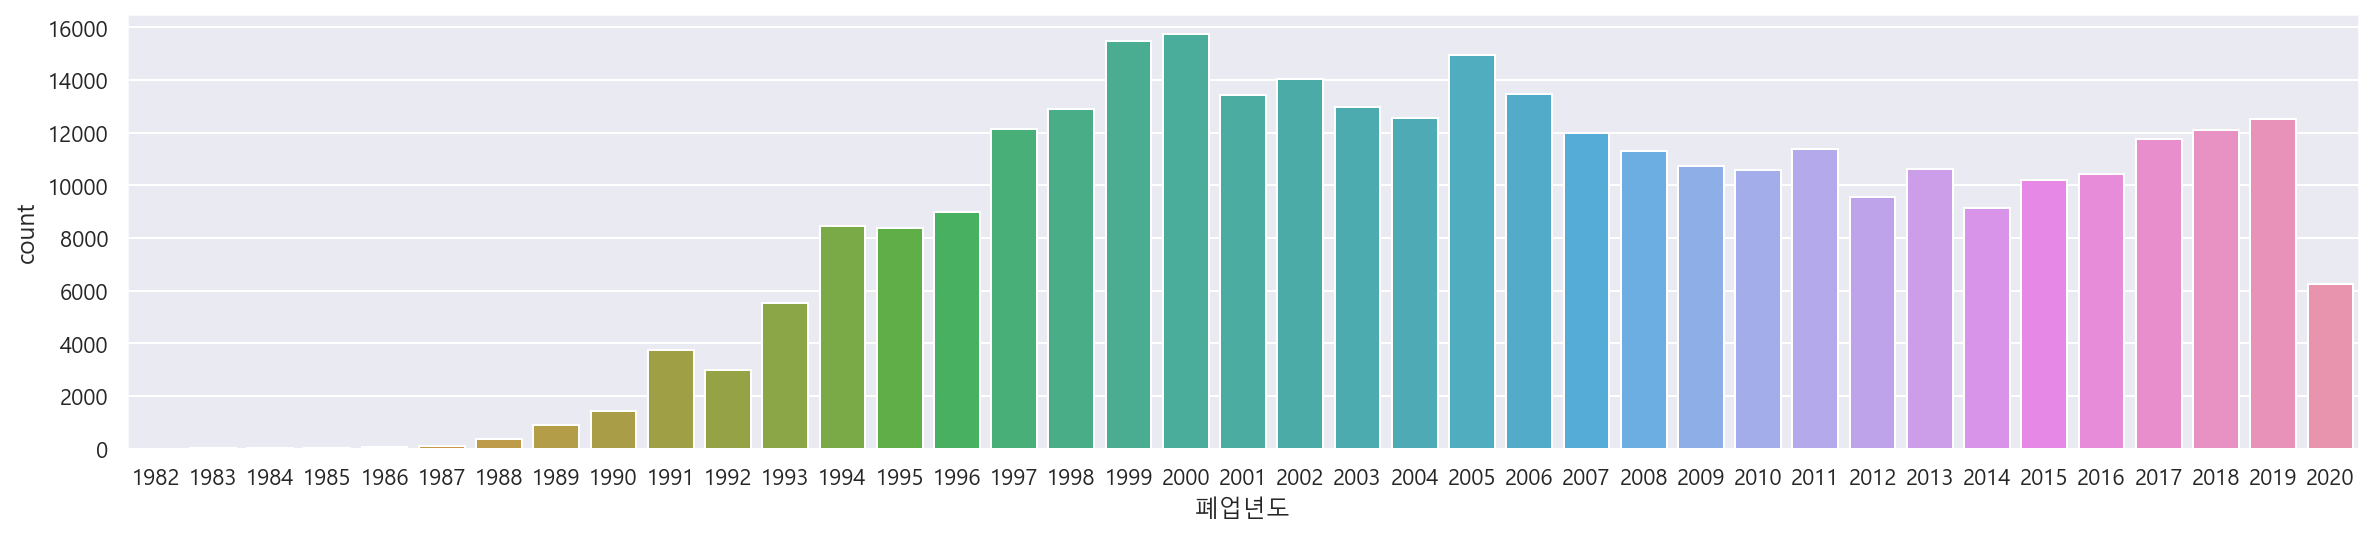

In [35]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_closed, x="폐업년도")
plt.show()

In [36]:
def change(x):
    if x["상하반기"]<=6:
        return 1
    else:
        return 2

In [37]:
df_closed["상하반기"] = df_closed["폐업일자"].map(lambda x: int(x//100%100))
df_closed

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),인허가년도,폐업년도,영업기간,상하반기
7112,7113,19841121,2,폐업,19961119,서울특별시 종로구 와룡동 168-0번지,NaN,고니,분식,nan,nan,1984,1996,12,11
7113,7114,19841121,2,폐업,19930401,서울특별시 종로구 이화동 192-2번지,NaN,임진강,정종/대포집/소주방,200191,452671,1984,1993,9,4
7114,7115,19841122,2,폐업,20030127,서울특별시 종로구 관훈동 186-0번지,NaN,청동시대,경양식,198561,452428,1984,2003,19,1
7115,7116,19841122,2,폐업,19970128,서울특별시 종로구 청진동 258-1번지,NaN,갤러리호프,분식,nan,nan,1984,1997,13,1
7116,7117,19841122,2,폐업,20020130,서울특별시 종로구 종로3가 137번지,NaN,종로손칼국수,분식,nan,nan,1984,2002,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197,2001,2002,1,3
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088,2001,2002,1,7
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995,2001,2004,3,5
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798,2001,2012,11,11


In [38]:
df_closed["상하반기"] = df_closed.apply(change, axis=1)
df_closed

,번호,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),인허가년도,폐업년도,영업기간,상하반기
7112,7113,19841121,2,폐업,19961119,서울특별시 종로구 와룡동 168-0번지,NaN,고니,분식,nan,nan,1984,1996,12,2
7113,7114,19841121,2,폐업,19930401,서울특별시 종로구 이화동 192-2번지,NaN,임진강,정종/대포집/소주방,200191,452671,1984,1993,9,1
7114,7115,19841122,2,폐업,20030127,서울특별시 종로구 관훈동 186-0번지,NaN,청동시대,경양식,198561,452428,1984,2003,19,1
7115,7116,19841122,2,폐업,19970128,서울특별시 종로구 청진동 258-1번지,NaN,갤러리호프,분식,nan,nan,1984,1997,13,1
7116,7117,19841122,2,폐업,20020130,서울특별시 종로구 종로3가 137번지,NaN,종로손칼국수,분식,nan,nan,1984,2002,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451961,452111,20010713,2,폐업,20020326,서울특별시 강동구 길동 413-50번지,NaN,현대식당,한식,212128,448197,2001,2002,1,1
451962,452112,20010713,2,폐업,20020715,서울특별시 강동구 길동 228-1번지,NaN,토끼와장닭,한식,212617,448088,2001,2002,1,2
451963,452113,20010803,2,폐업,20040513,서울특별시 강동구 천호동 438-1번지,NaN,라이브,분식,211159,448995,2001,2004,3,1
451964,452114,20010803,2,폐업,20121129,서울특별시 강동구 암사동 501-2번지 3층,NaN,더블루,호프/통닭,211234,449798,2001,2012,11,2


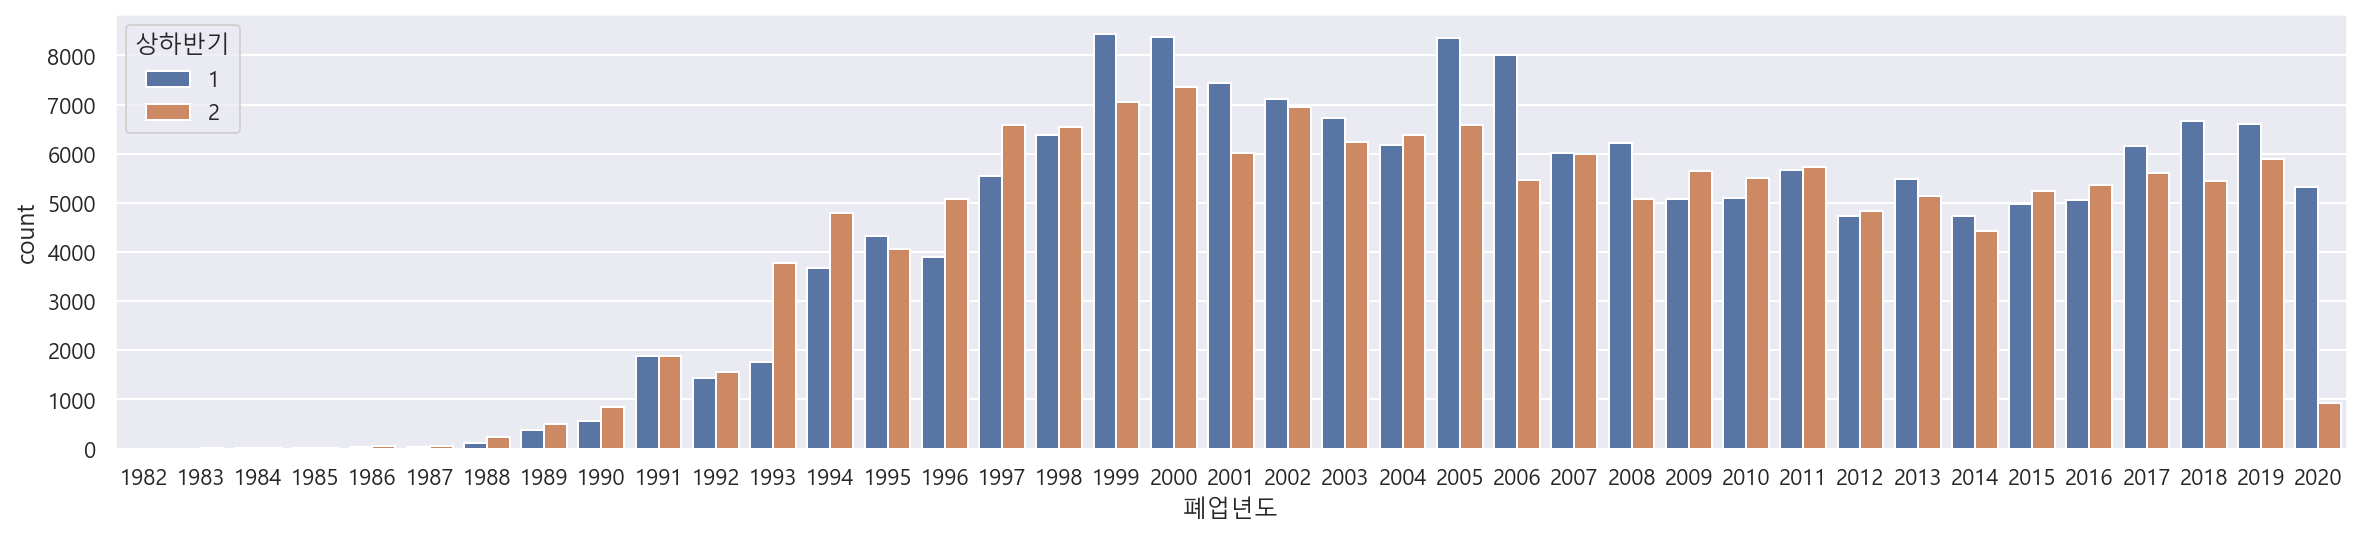

In [39]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_closed, x="폐업년도", hue="상하반기")
plt.show()